# Задание
Сгенерировать __N__ облаков (классов) с __M__ точками (объектами) в каждом. Построить классификатор используя *scikit-learn* который достигнет точности __R__ лежащей в интервале __(R1, R2)__.R1

Вариант 25. N = 5, M = 968, (R1,R2) = (0,676;0,686).

# План действий.

1. Сгенерировать набор данных, удовлетворяющих условию варианта. Построить.
2. Разметить.
3. Создать классификатор, обучить на половине выборки.
4. Проверить классификатор на 2 половине выборки, отобразить точность.
5. Матрица ошибок?

# 0. Проинициализируем начальные данные

Библиотеки:

In [128]:
!pip install numpy
!pip install matplotlib
!pip install scikit-learn

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

Входные данные:

In [130]:
N = 5                # кол-во классов
M = 968              # кол-во точек в каждом классе
R1 = 0,676           # интервал точности
R2 = 0,686

CLASSES_DISTANCE = 1.2 # расстояние между классами, которое использовать при генерации
TEST_DATA_SIZE = 0.5 # размер тестовой выборки, 0 <= TEST_DATA_SIZE <= 1

# 1. Сгенерировать набор данных, удовлетворяющих условию варианта. Построить.

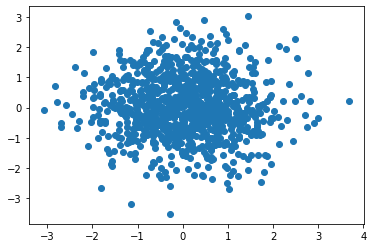

In [131]:
noise = np.random.randn(M, 2) # M точек, 2 координаты
plt.scatter(noise[:, 0], noise[:, 1])

[]

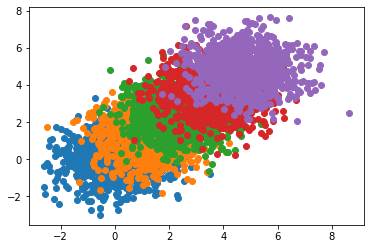

In [132]:
# генерация данных:
classes = []
for i in range(N):
    noise = np.random.randn(M, 2) # M точек, 2 координаты
    x_shift = CLASSES_DISTANCE * i
    y_shift = CLASSES_DISTANCE * i
    shifted_noise = noise +  np.array([x_shift, y_shift])
    
    classes.append(shifted_noise)

# построение графика:
for class_i in classes:
    plt.scatter(class_i[:, 0], class_i[:, 1])
plt.plot()

# 2. Разметить.

In [133]:
# объединение всех массивов с классами в один
all_classes = np.vstack(classes)

In [134]:
# создание аннотаций для каждого экземпляра
annotations = []
for i in range(N):
    current_class_annotations = [i] * M
    annotations.extend(current_class_annotations)

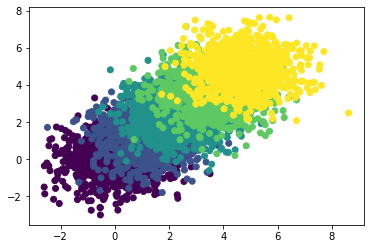

In [135]:
# построить график
plt.scatter(all_classes[:,0], all_classes[:,1], c=annotations)

# 3. Создать классификатор, обучить на половине выборки.

In [136]:
# перемешаем данные
shuffled_all_classes, labels = shuffle(all_classes, annotations)

In [137]:
# разделим данные на обучающие и тестовые выборки
test_size = int(len(shuffled_all_classes) * TEST_DATA_SIZE)
Xtrain = shuffled_all_classes[:test_size]
Ytrain = labels[:test_size]
Xtest = shuffled_all_classes[test_size:]
Ytest = labels[test_size:]
print(test_size)
print(len(Ytest))

2420
2420


In [138]:
# создадим и обучим классификатор
clf = LogisticRegression()
clf.fit(Xtrain, Ytrain)

LogisticRegression()

# 4. Проверить классификатор на 2 половине выборки, отобразить точность.

In [139]:
predictions = clf.predict(Xtest)
accuracy_score(Ytest, predictions)

0.6946280991735537

# 5. Матрица ошибок

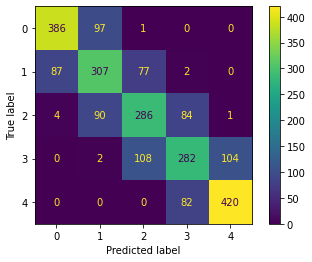

In [140]:
cm = confusion_matrix(Ytest, predictions)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

# Результат

1. Параметры генерации данных: при расстоянии межджу классами равном 1.2 классификатор достигает точности в промежутке (0,676; 0,686).
2. Графическое представления расположения набора данных (двумерный график, в котором каждый класс обозначен своим цветом) - сделано.
3. Матрицу ошибок - построена выше.
4. Значение точности классификации - 0.6797520661157025.